<a href="https://colab.research.google.com/github/Eghbal43/Digital-control-project/blob/main/April24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 2010-2019_currency.csv to 2010-2019_currency (6).csv
Files in current directory: ['.config', 'afn_usd_exchange_rate.png', '2010-2019_currency (5).csv', '2010-2019_currency (2).csv', 'afn_pkr_exchange_rate.png', 'afn_riyal_exchange_rate.png', 'afn_swiss_exchange_rate.png', '2010-2019_currency (4).csv', 'afn_all_currencies_exchange_rate.png', '2010-2019_currency.csv', '2010-2019_currency (6).csv', 'afn_euro_exchange_rate.png', 'afn_pound_exchange_rate.png', 'afn_toman_exchange_rate.png', '2010-2019_currency (3).csv', 'afn_riyal _exchange_rate.png', '2010-2019_currency (1).csv', 'afn_inr_exchange_rate.png', 'afn_dirham_exchange_rate.png', 'sample_data']


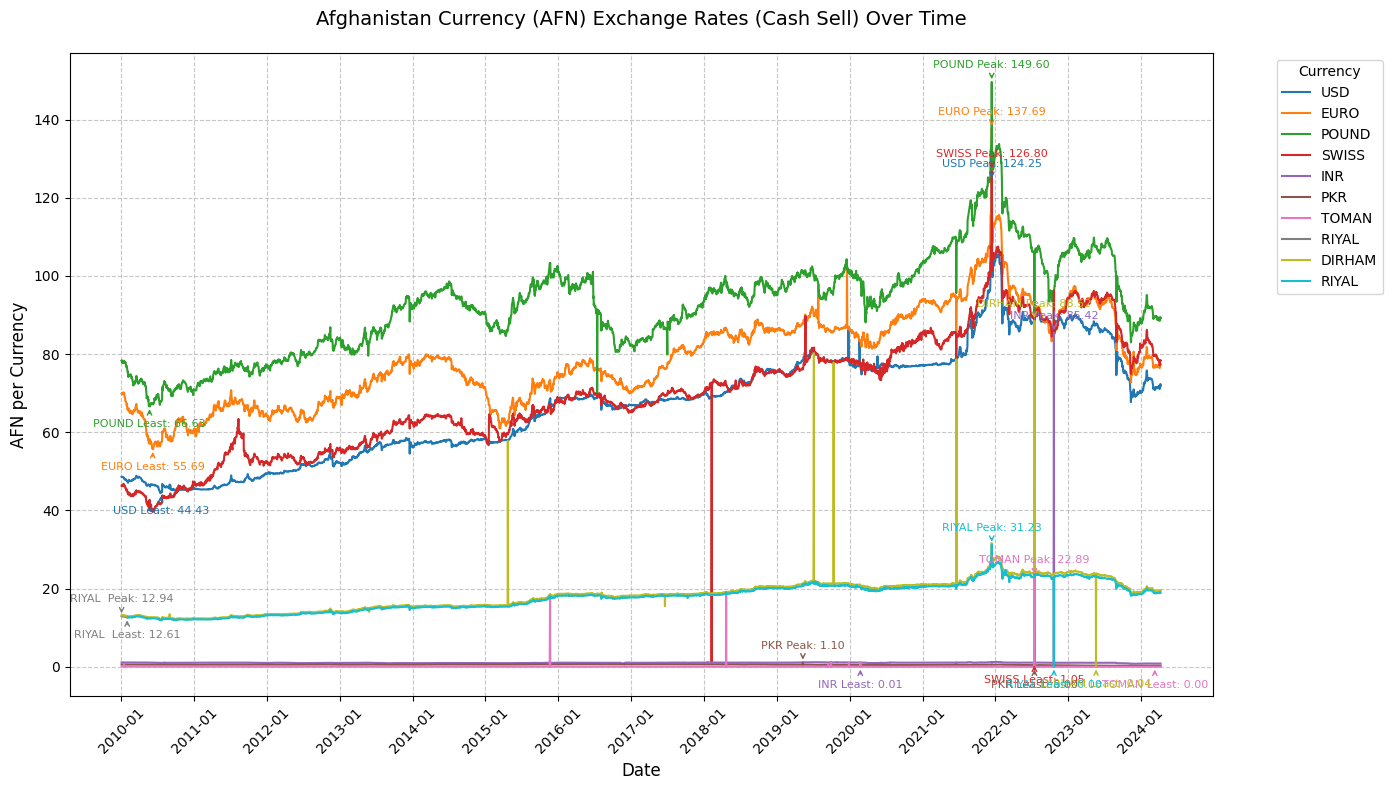

Main plot saved as 'afn_all_currencies_exchange_rate.png'


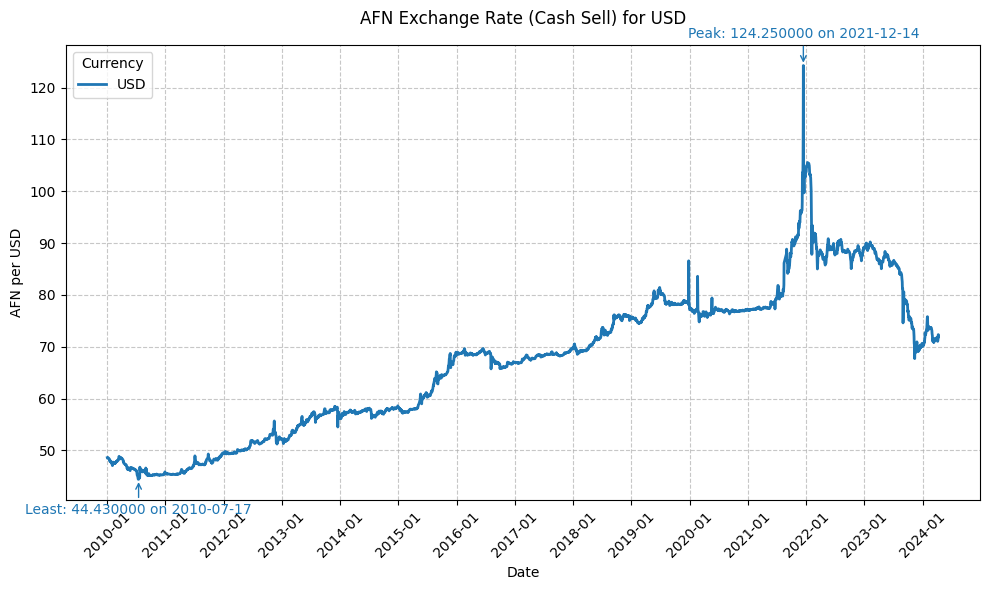

Individual plot for USD saved as 'afn_usd_exchange_rate.png'


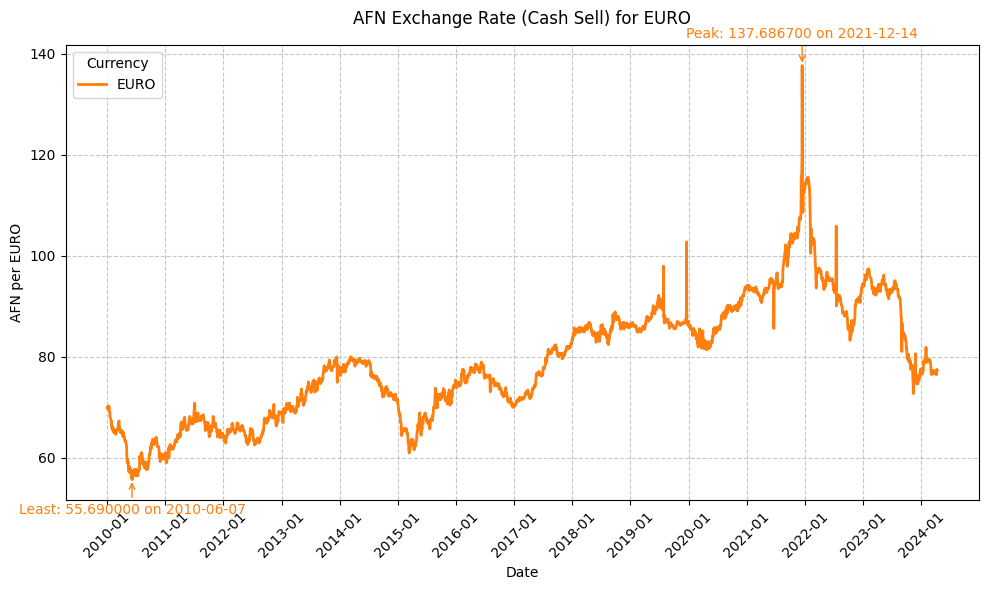

Individual plot for EURO saved as 'afn_euro_exchange_rate.png'


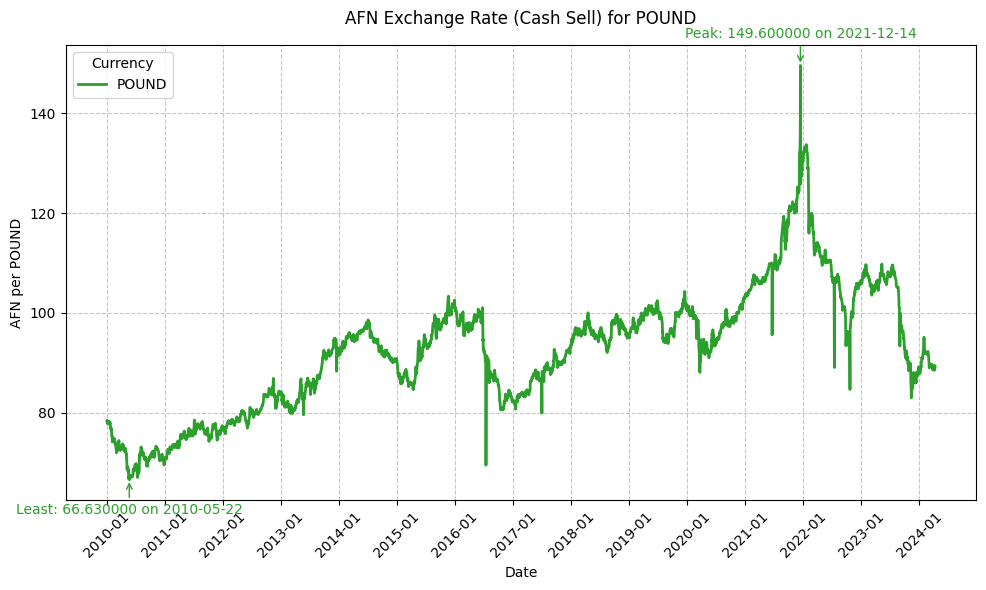

Individual plot for POUND saved as 'afn_pound_exchange_rate.png'


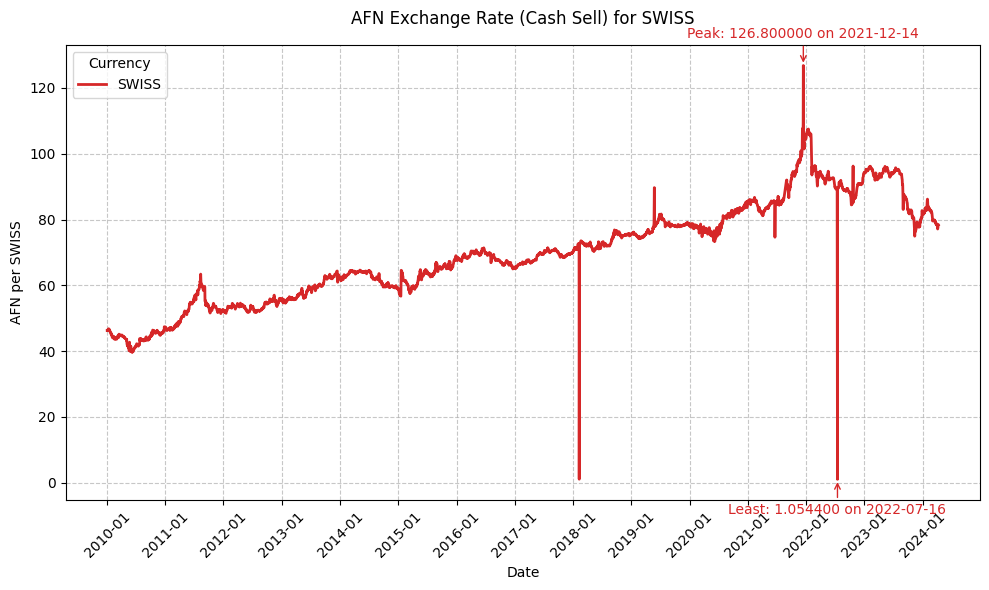

Individual plot for SWISS saved as 'afn_swiss_exchange_rate.png'


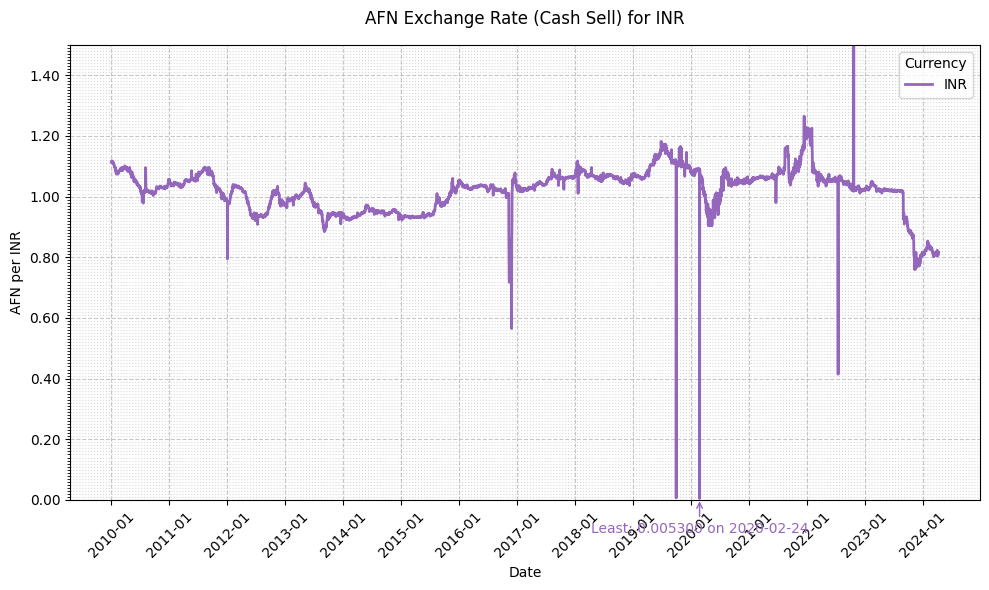

Individual plot for INR saved as 'afn_inr_exchange_rate.png'


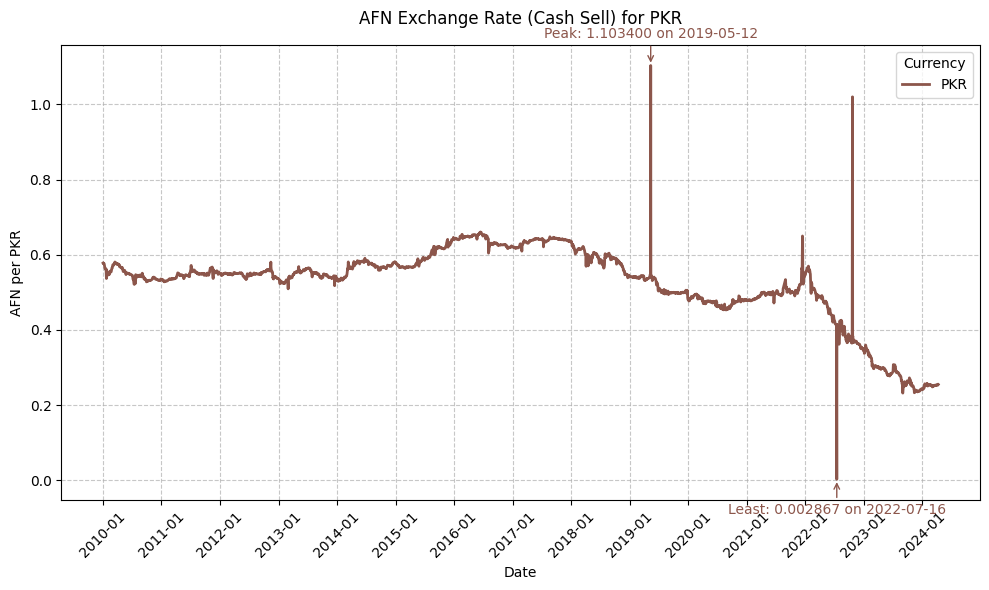

Individual plot for PKR saved as 'afn_pkr_exchange_rate.png'


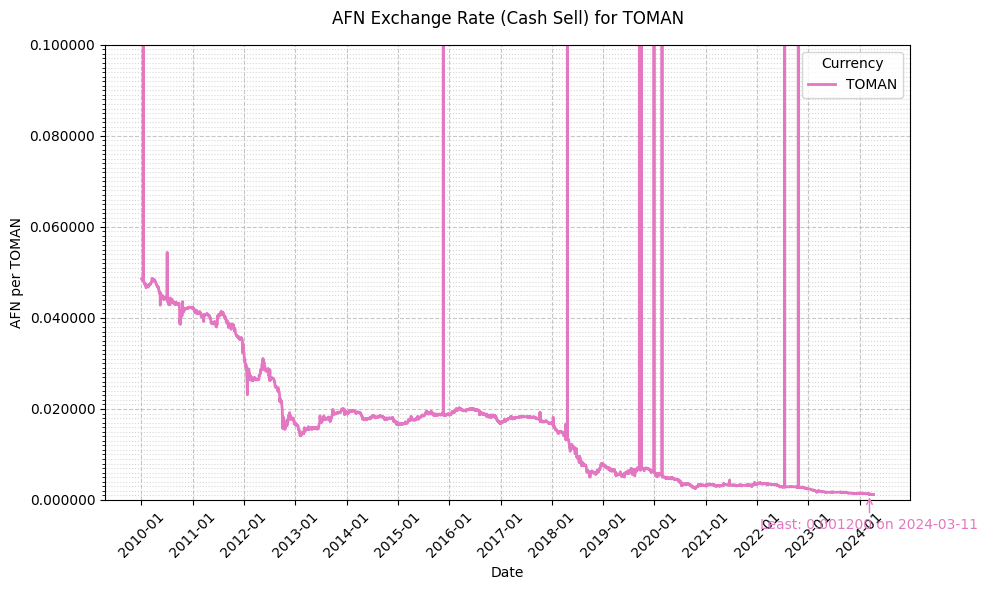

Individual plot for TOMAN saved as 'afn_toman_exchange_rate.png'


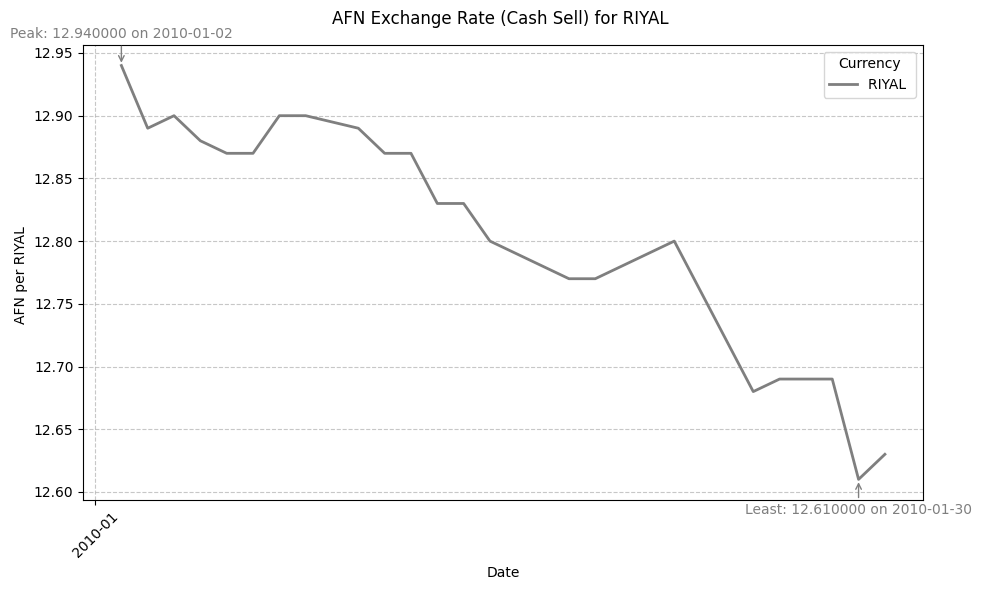

Individual plot for RIYAL  saved as 'afn_riyal _exchange_rate.png'


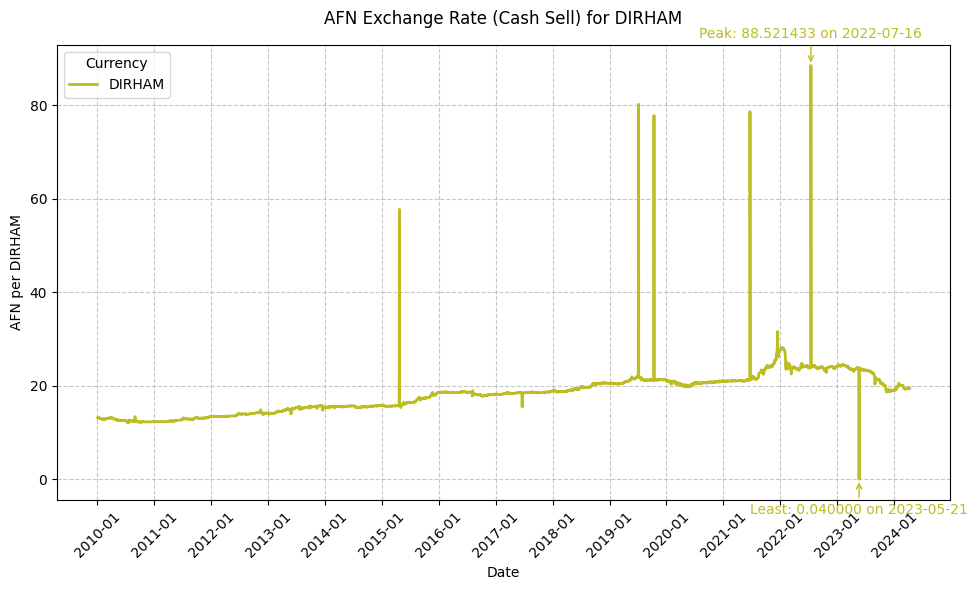

Individual plot for DIRHAM saved as 'afn_dirham_exchange_rate.png'


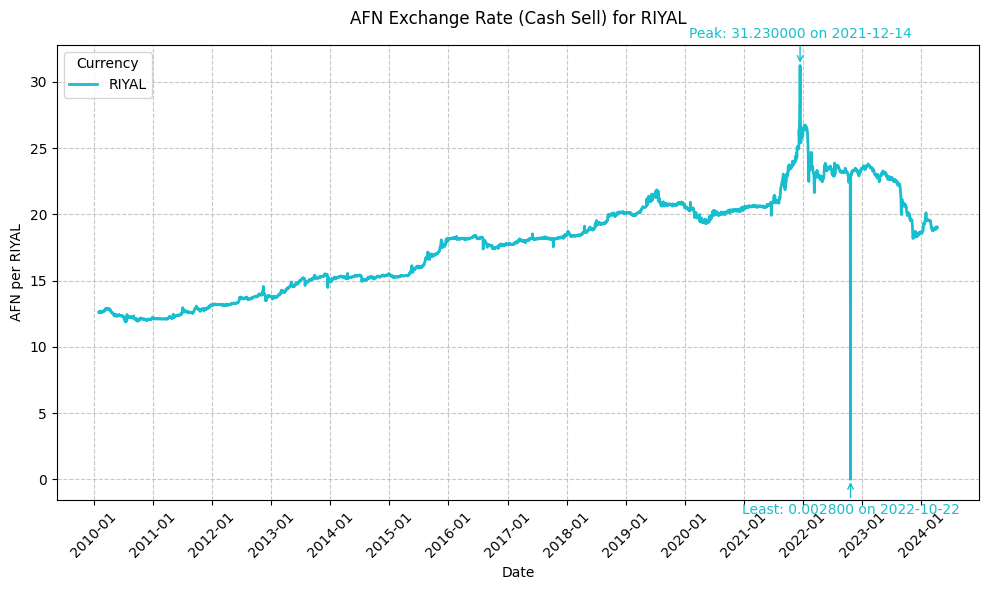

Individual plot for RIYAL saved as 'afn_riyal_exchange_rate.png'

Peak and Least Values for Each Currency:
USD:
  Peak value: 124.250000 AFN/USD on 2021-12-14
  Least value: 44.430000 AFN/USD on 2010-07-17
EURO:
  Peak value: 137.686700 AFN/EURO on 2021-12-14
  Least value: 55.690000 AFN/EURO on 2010-06-07
POUND:
  Peak value: 149.600000 AFN/POUND on 2021-12-14
  Least value: 66.630000 AFN/POUND on 2010-05-22
SWISS:
  Peak value: 126.800000 AFN/SWISS on 2021-12-14
  Least value: 1.054400 AFN/SWISS on 2022-07-16
INR:
  Peak value: 85.420067 AFN/INR on 2022-10-22
  Least value: 0.005300 AFN/INR on 2020-02-24
PKR:
  Peak value: 1.103400 AFN/PKR on 2019-05-12
  Least value: 0.002867 AFN/PKR on 2022-07-16
TOMAN:
  Peak value: 22.890000 AFN/TOMAN on 2022-07-16
  Least value: 0.001200 AFN/TOMAN on 2024-03-11
RIYAL :
  Peak value: 12.940000 AFN/RIYAL  on 2010-01-02
  Least value: 12.610000 AFN/RIYAL  on 2010-01-30
DIRHAM:
  Peak value: 88.521433 AFN/DIRHAM on 2022-07-16
  Least value: 0.040000

In [7]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

# Upload the CSV file
uploaded = files.upload()

# List files to verify the uploaded file name
import os
print("Files in current directory:", os.listdir())

# Load data from CSV file
df = pd.read_csv('2010-2019_currency.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')

# Remove rows with invalid dates or missing Cash_sell
df = df.dropna(subset=['Date', 'Cash_sell'])

# Convert Cash_sell to numeric, handling non-numeric values
df['Cash_sell'] = pd.to_numeric(df['Cash_sell'], errors='coerce')
df = df.dropna(subset=['Cash_sell'])

# Get unique currencies
currencies = df['Currency'].unique()

# Define colors for each currency
colors = plt.cm.tab10.colors[:len(currencies)]  # Use tab10 colormap for distinct colors
currency_colors = dict(zip(currencies, colors))

# --- Main Plot: All Currencies ---
plt.figure(figsize=(14, 8))

for currency in currencies:
    # Filter data for the current currency
    curr_df = df[df['Currency'] == currency][['Date', 'Cash_sell']].copy()
    curr_df = curr_df.sort_values('Date')

    # Plot the line
    plt.plot(curr_df['Date'], curr_df['Cash_sell'],
             label=f'{currency}',
             color=currency_colors[currency],
             linewidth=1.5)

    # Find peak and least values
    peak = curr_df.loc[curr_df['Cash_sell'].idxmax()]
    least = curr_df.loc[curr_df['Cash_sell'].idxmin()]

    # Annotate peak
    plt.annotate(f'{currency} Peak: {peak["Cash_sell"]:.2f}',
                 xy=(peak['Date'], peak['Cash_sell']),
                 xytext=(0, 10),  # Offset above
                 textcoords='offset points',
                 color=currency_colors[currency],
                 fontsize=8,
                 ha='center',
                 arrowprops=dict(arrowstyle='->', color=currency_colors[currency]))

    # Annotate least
    plt.annotate(f'{currency} Least: {least["Cash_sell"]:.2f}',
                 xy=(least['Date'], least['Cash_sell']),
                 xytext=(0, -15),  # Offset below
                 textcoords='offset points',
                 color=currency_colors[currency],
                 fontsize=8,
                 ha='center',
                 arrowprops=dict(arrowstyle='->', color=currency_colors[currency]))

# Customize the main plot
plt.title('Afghanistan Currency (AFN) Exchange Rates (Cash Sell) Over Time', fontsize=14, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('AFN per Currency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Currency', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=45)
plt.tight_layout()

# Display and save the main plot
plt.show()
plt.savefig('afn_all_currencies_exchange_rate.png')
plt.close()

print(f"Main plot saved as 'afn_all_currencies_exchange_rate.png'")

# --- Individual Plots: One per Currency ---
for currency in currencies:
    # Filter data for the current currency
    curr_df = df[df['Currency'] == currency][['Date', 'Cash_sell']].copy()
    curr_df = curr_df.sort_values('Date')

    # Create a new figure for the currency
    plt.figure(figsize=(10, 6))

    # Plot the line
    plt.plot(curr_df['Date'], curr_df['Cash_sell'],
             label=f'{currency}',
             color=currency_colors[currency],
             linewidth=2)

    # Find peak and least values
    peak = curr_df.loc[curr_df['Cash_sell'].idxmax()]
    least = curr_df.loc[curr_df['Cash_sell'].idxmin()]

    # Annotate peak
    plt.annotate(f'Peak: {peak["Cash_sell"]:.6f} on {peak["Date"].strftime("%Y-%m-%d")}',
                 xy=(peak['Date'], peak['Cash_sell']),
                 xytext=(0, 20),  # Increased offset
                 textcoords='offset points',
                 color=currency_colors[currency],
                 fontsize=10,
                 ha='center',
                 arrowprops=dict(arrowstyle='->', color=currency_colors[currency]))

    # Annotate least
    plt.annotate(f'Least: {least["Cash_sell"]:.6f} on {least["Date"].strftime("%Y-%m-%d")}',
                 xy=(least['Date'], least['Cash_sell']),
                 xytext=(0, -25),  # Increased offset
                 textcoords='offset points',
                 color=currency_colors[currency],
                 fontsize=10,
                 ha='center',
                 arrowprops=dict(arrowstyle='->', color=currency_colors[currency]))

    # Customize the individual plot
    plt.title(f'AFN Exchange Rate (Cash Sell) for {currency}', fontsize=12, pad=15)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel(f'AFN per {currency}', fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Special handling for INR and TOMAN
    if currency == 'TOMAN':
        # Set y-axis limits for TOMAN to 0 to 0.1
        plt.ylim(0, 0.1)
        # Add fine minor gridlines every 0.001
        plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.001))
        plt.grid(True, which='minor', linestyle=':', alpha=0.5)
        # High precision on y-axis ticks
        plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.6f'))
    elif currency == 'INR':
        # Custom y-axis for INR
        plt.ylim(0, 1.5)
        plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.01))
        plt.grid(True, which='minor', linestyle=':', alpha=0.5)
        plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
    else:
        # Standard grid for other currencies
        plt.grid(True, linestyle='--', alpha=0.7)

    plt.legend(title='Currency')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display and save the individual plot
    plt.show()
    plt.savefig(f'afn_{currency.lower()}_exchange_rate.png')
    plt.close()

    print(f"Individual plot for {currency} saved as 'afn_{currency.lower()}_exchange_rate.png'")

# --- Print Peak and Least Values ---
print("\nPeak and Least Values for Each Currency:")
for currency in currencies:
    curr_df = df[df['Currency'] == currency][['Date', 'Cash_sell']].copy()
    curr_df = curr_df.sort_values('Date')
    peak = curr_df.loc[curr_df['Cash_sell'].idxmax()]
    least = curr_df.loc[curr_df['Cash_sell'].idxmin()]
    print(f"{currency}:")
    print(f"  Peak value: {peak['Cash_sell']:.6f} AFN/{currency} on {peak['Date'].strftime('%Y-%m-%d')}")
    print(f"  Least value: {least['Cash_sell']:.6f} AFN/{currency} on {least['Date'].strftime('%Y-%m-%d')}")